# <center>Implementation of autocorrelation function from scratch</center>

## Import libraies

In [113]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt
import seaborn as sns

## Mean of the population

In [114]:
def mean(population):
    shape = np.shape(population)
    length_of_population = shape[0]
    if length_of_population == 0:
        mean = 0
    else:
        mean = np.sum(population)/length_of_population
    return mean

## Variance of the population

In [115]:
def variance(population):
    shape = np.shape(population)
    length_of_population = shape[0]
    if length_of_population == 0:
        variance = 0
    else:
        deviation_from_mean = population - mean(population)
        squares_of_devaiation = deviation_from_mean ** 2
        variance = np.sum(squares_of_devaiation)/length_of_population
    return variance

## Standard devaition of the population

In [116]:
def standard_deviation(population):
    var = variance(population)
    sd = np.sqrt(var)
    return sd

## Pearson correlation coefficient

In [117]:
def pearson_correlation_coef(A, B):
    shape_A = np.shape(A)
    shape_B = np.shape(B)
    if shape_A[0] != shape_B[0]:
        print("Error in correlation function. The length of two lists are not same.")
    else:
        num = np.sum((A - mean(A)) * (B - mean(B)))
        den = standard_deviation(A) * standard_deviation(B) * shape_A[0]
        correlation_coef = num/den
        return correlation_coef

## Plot autocorrelation fucntion
- correlation_coef  is a helper function for finding autocorrelation.

In [118]:
def correlation_coef(A, B, mean_population, var_population, length):
    shape_A = np.shape(A)
    shape_B = np.shape(B)
    if shape_A[0] != shape_B[0]:
        print("Error in correlation function. The length of two lists are not same.")
    else:
        num = np.sum((A - mean_population) * (B - mean_population))
        den = var_population * length
        correlation_coef = num/den
        return correlation_coef


def autocorrelation_function(population):
    autocorrelation_coefs = []
    length = np.shape(population)[0]
    mean_population = mean(population)
    var_population = variance(population)
    for lag in range(0, length):
        A = population[lag: ]
        B = population[:length-lag]
        corr_coef = correlation_coef(A, B, mean_population, var_population, length)
        autocorrelation_coefs.append(corr_coef)
    return autocorrelation_coefs

In [119]:
def plot_ACF(population):
    length = np.shape(population)[0]
    autocorrelation_coefs = autocorrelation_function(population)
    lag = np.array(range(0, length))
    
    print(lag)
    print(autocorrelation_coefs)
    fig = plt.figure()
    plt.bar(lag, autocorrelation_coefs, width=0.1)
    plt.axhline(0, color='black')
    plt.show()

## Sample data

In [120]:
sample_data = [1,5,10,3,2,7]

## Plot Autocorrelation function - correlation for all values of lag k. 

[0 1 2 3 4 5]
[1.0000000000000002, -0.17635658914728683, -0.6666666666666669, 0.308139534883721, 0.184108527131783, -0.1492248062015504]


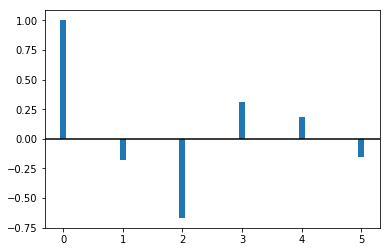

In [121]:
plot_ACF(sample_data)

## ACF plot generated using 'statsmodels' library

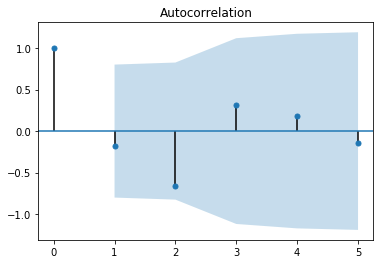

In [122]:
plot_acf(sample_data)
pyplot.show()

### As we see, my output is matching with the output that is generated by the statsmodels library.